In [74]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [51]:
df = pd.read_csv('/Users/animeshsrivastava/Downloads/Housing.csv')

In [52]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


This data clearly has categorical datasets , hence we will have to convert these values into conitnuous data.
Yes - 1 for eg
No - 0

We will analyse the data -  both numerical and categorical



In [53]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [54]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

We have got the datatypes of each column here. 
Now lets check the metadata information in each of them at dataset level then we will drill down into the analysis for each column.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


This clearly shows that there are no null values in the dataset.
########## What if there were null values ? How do you deal with it? ################
https://www.analyticsvidhya.com/blog/2021/05/a-comprehensive-guide-to-data-analysis-using-pandas-hands-on-data-analysis-on-imdb-movies-data/


Here is the complete analysis we want to do on the data
https://www.simplilearn.com/tutorials/data-analytics-tutorial/data-analytics-with-python

https://towardsdatascience.com/a-beginners-guide-to-data-analysis-in-python-188706df5447

These above articles have mostly covered the analysis we would be needing.


In [19]:
df.shape

(545, 13)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'parking'}>]], dtype=object)

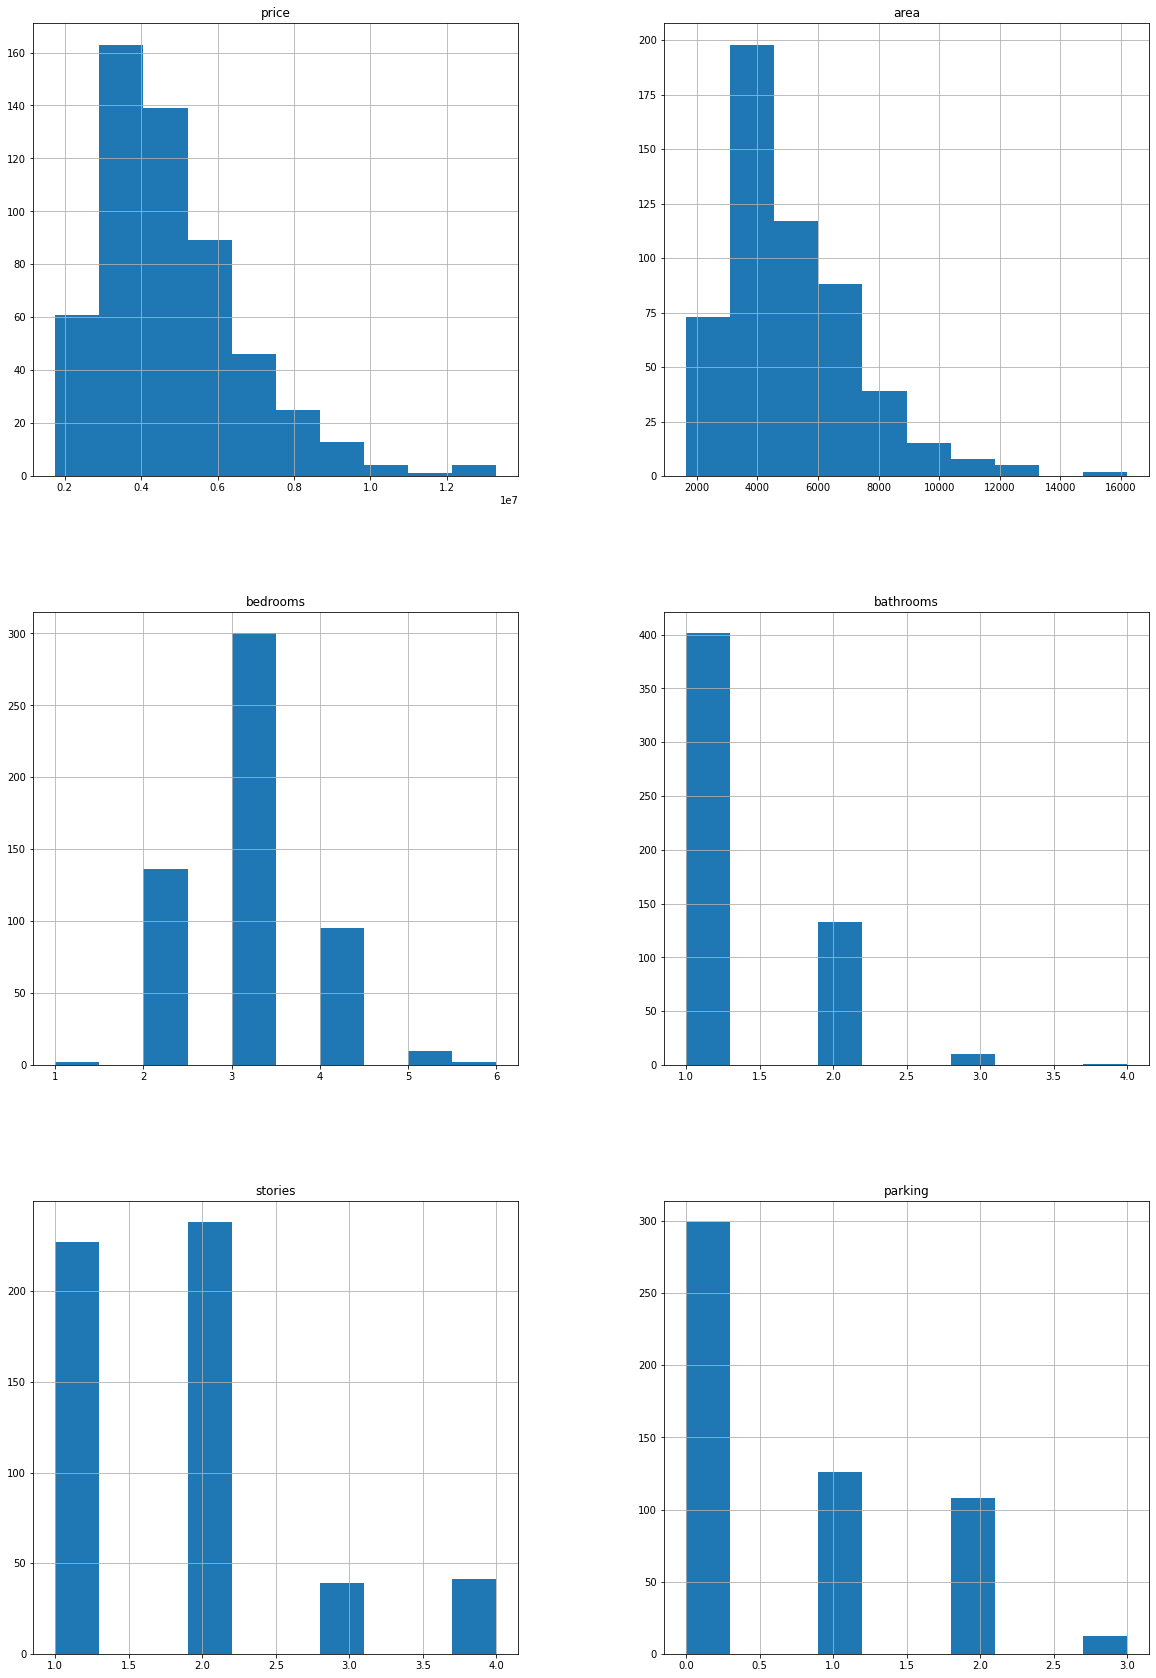

In [21]:
df.hist(figsize  = (20,30))

<AxesSubplot:>

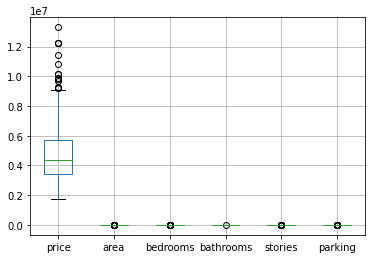

In [22]:
df.boxplot()

Either it can be plotted together or can be plotted individually.

<AxesSubplot:>

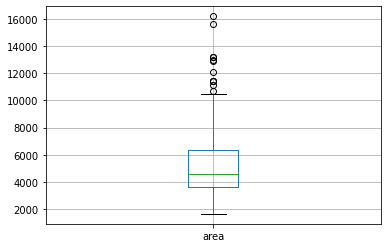

In [23]:
df[['area']].boxplot()

<AxesSubplot:>

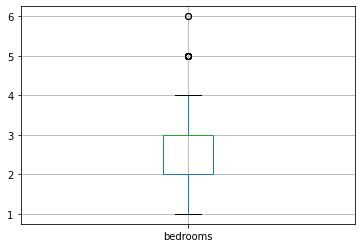

In [25]:
df[['bedrooms']].boxplot()

Do we really need to see this value - We obviously can have houses with 6 bedrooms. So lets see how many of them are there.

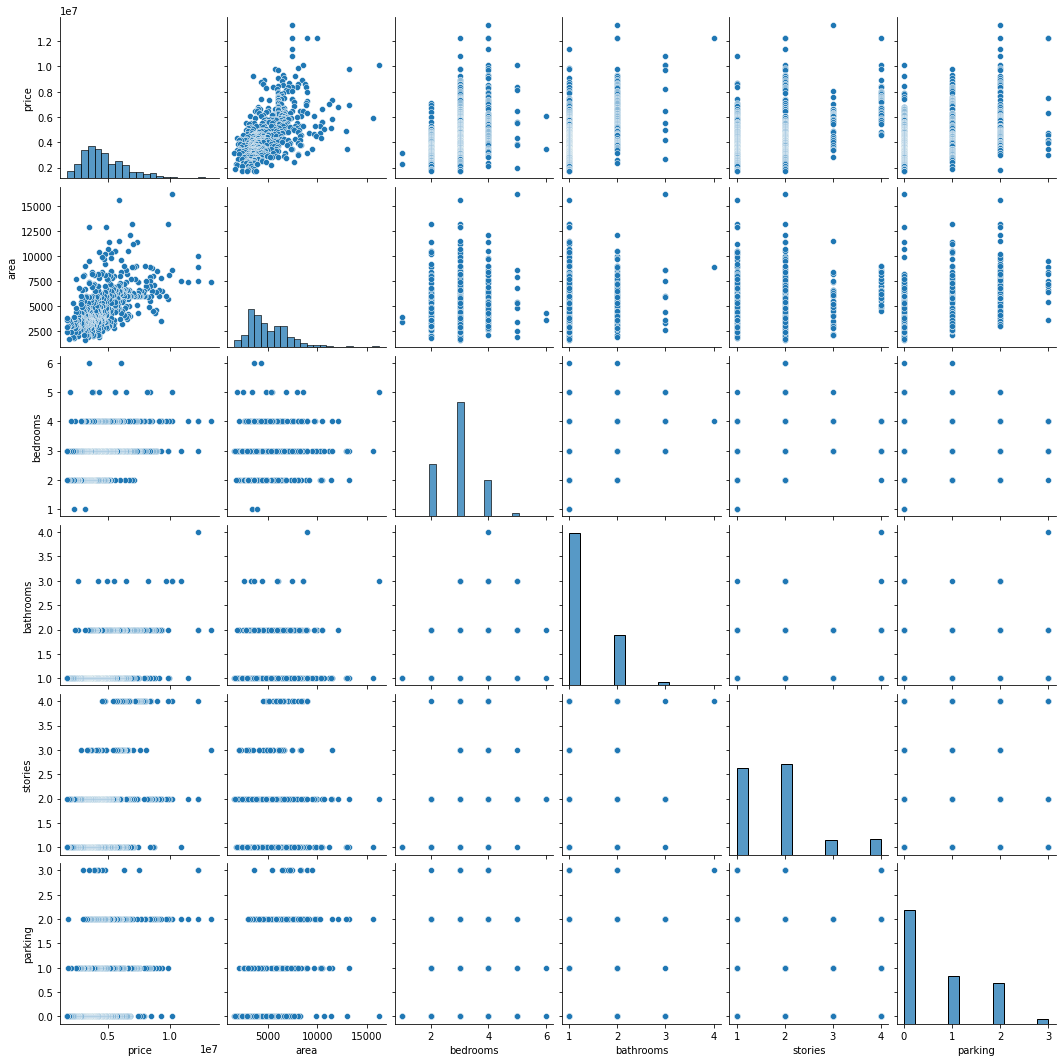

In [57]:
sns.pairplot(df)

In [59]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [26]:
df.groupby('bedrooms').count()

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
bedrooms,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2
2,136,136,136,136,136,136,136,136,136,136,136,136
3,300,300,300,300,300,300,300,300,300,300,300,300
4,95,95,95,95,95,95,95,95,95,95,95,95
5,10,10,10,10,10,10,10,10,10,10,10,10
6,2,2,2,2,2,2,2,2,2,2,2,2


In [33]:
df.groupby('bedrooms').size()

bedrooms
1      2
2    136
3    300
4     95
5     10
6      2
dtype: int64

Note the difference in the above queries -  count and size. There is another way of getting count - value_counts

## Update this when we a dataset with Nan and document the difference## 

In [39]:
df['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
1      2
6      2
Name: bedrooms, dtype: int64

## This is a clean data set with no Nan, hence we are not doing analysis of each of the numerical columns. ##
## Moving ahead with columns having categorical values for analysis.  We have already seen no nulls in the data. ##

In [40]:
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

Mainroad is a binary variable with Yes and No - but **do we want to use them as categorical in analysis ?**
Since we are dealing with LM , we will convert them into continuous data. Lets analyse other columns as well and we will deal with all categorical data together.

In [41]:
df['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [42]:
df['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [43]:
df['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [44]:
df['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [45]:
df['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [46]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-dummy-coding

https://stats.stackexchange.com/questions/89533/convert-a-categorical-variable-to-a-numerical-variable-prior-to-regression

https://stackoverflow.com/questions/36285155/pandas-get-dummies

In [60]:
df = pd.get_dummies(df, ['mainroad','guestroom','basement' ,'hotwaterheating' , 'airconditioning','prefarea','furnishingstatus'])

In [61]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [78]:
c = df.corr()
mask = np.triu(np.ones_like(c,dtype = bool))

Please note: Mask is for hiding the other half of the chartb

<AxesSubplot:>

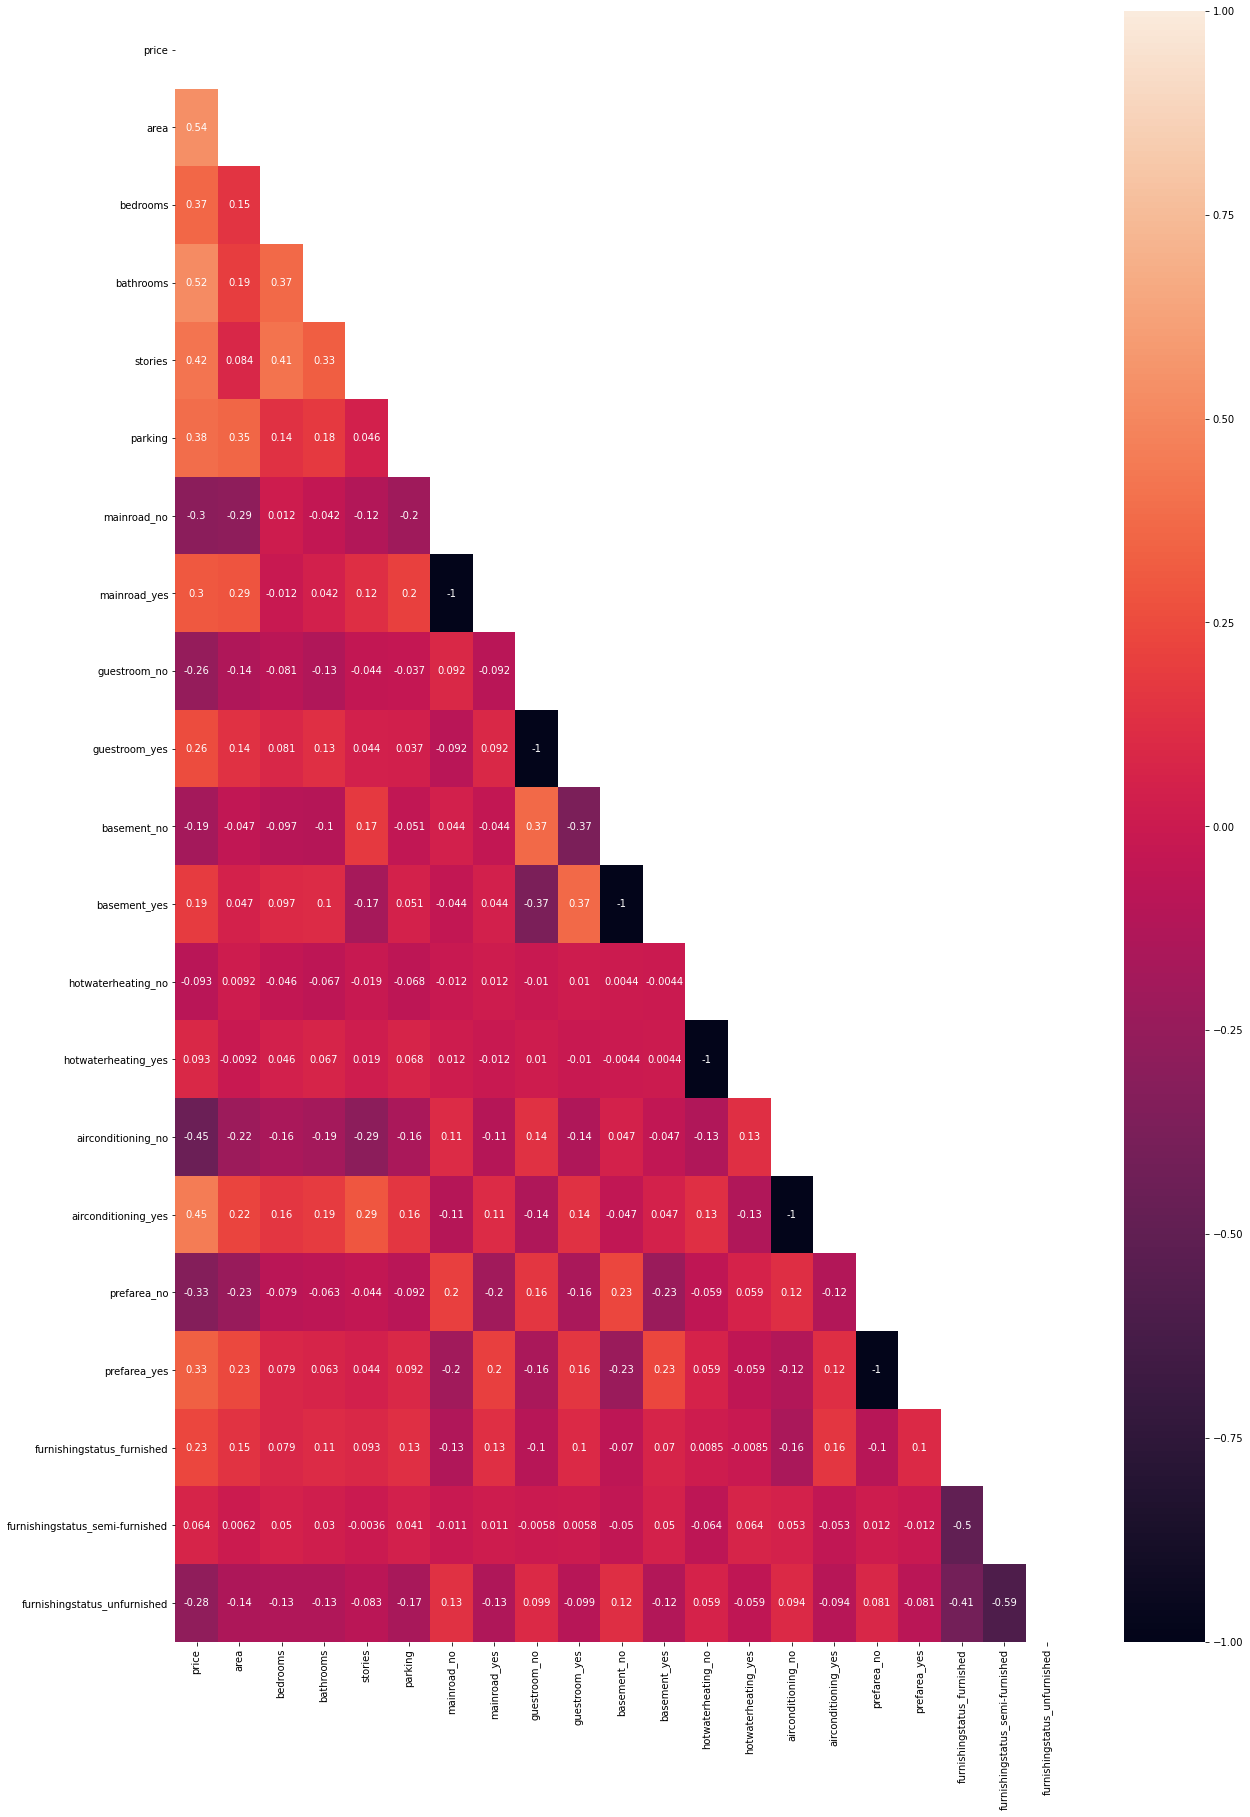

In [79]:
plt.figure(figsize = (20,30))
sns.heatmap(c, annot = True,vmin=-1,vmax=1,mask = mask)

<AxesSubplot:>

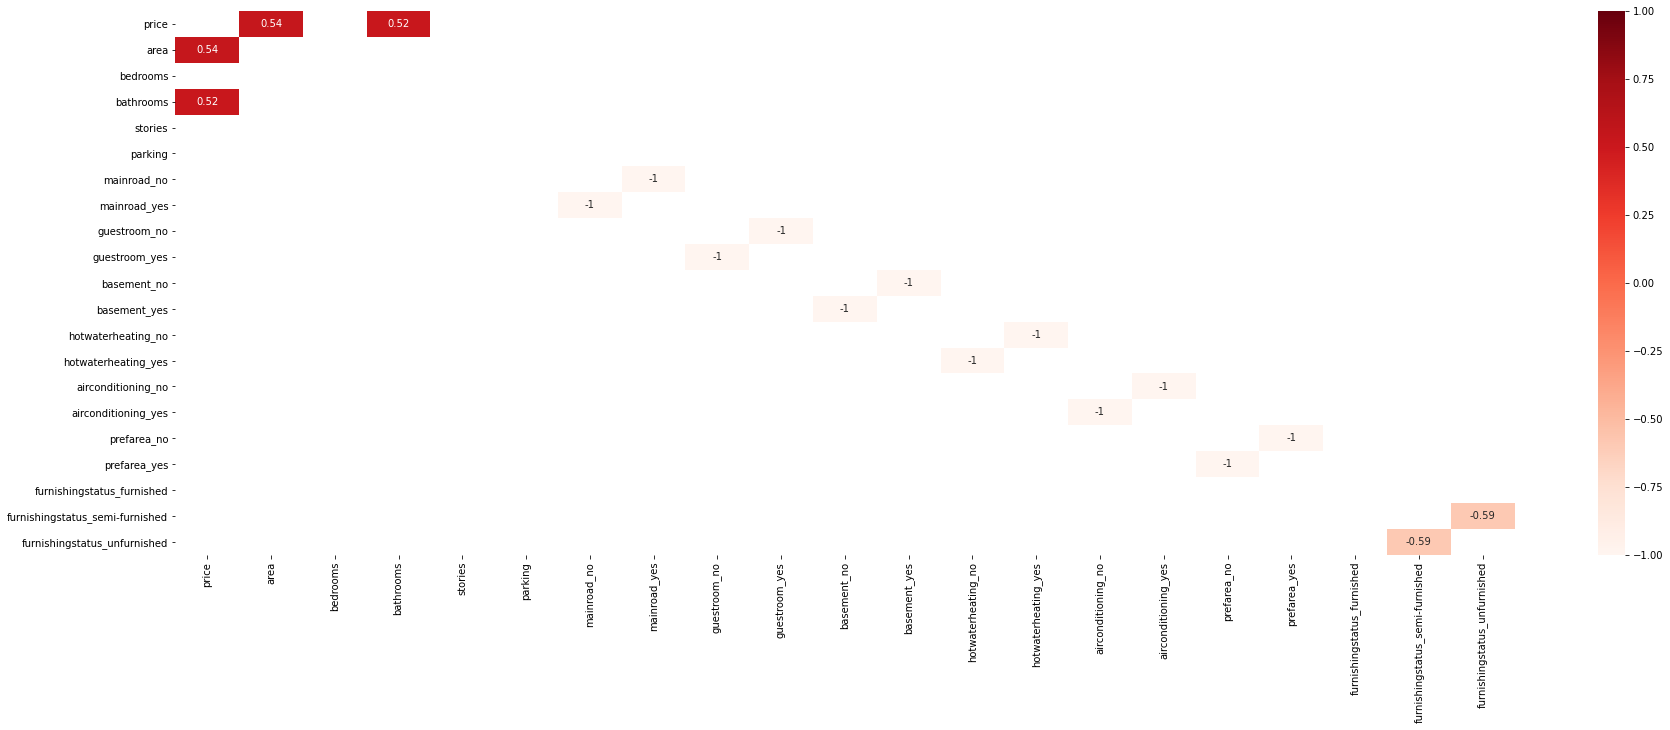

In [87]:
filteredDf = c[((c >= .5) | (c <= -.5)) & (c !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot = True,vmin=-1,vmax=1,cmap="Reds")

# Correlation Matrix
https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

The above article has all ways how to visualise correlation matrix